## Dataset

* IMDB: 50000 reviews.
* 25000 training instances and 25000 testing instances, each consists of 50% negative and 50% positive reviews.

## Loading the Data Set

In [55]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

* `num_words=10000` is for keeping the most frequentlu used 10000 words.

## Analyzing the Data

In [56]:
print('TRAIN DATA:', train_data)
print('TRAIN DATA[0]:', train_data[0])
print('TRAIN LABELS:', train_labels[0])

TRAIN DATA: [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 

* `train_data` and `test-data` are lists of movie reviews.
* Each list contains word indices which are defined in a dictionary.
* `train_labels` and `test_labels` are negative and positive movie reviews which are either 0 or 1.

* **Some points to keep in mind:**
    * No word index will exceed 10000.
    * We can also decode the review back to English.

In [57]:
# max([max(sequence) for sequence in train_data])

In [58]:
# index = imdb.get_word_index()
# reverse_index = dict(
#     [(value, key) for (key, value) in index.items()])
# decode = ' '.join(
#     [reverse_index.get(i - 3, '?') for i in train_data[0]])
# print(decode)

## Preparing the Data

* We have to feed tensors into the neural network.
* We will be using one-hot encoding to vectorize the data (our own way).

### One-Hot Encoding

In [59]:
import numpy as np

def vectorize(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize(train_data)
X_test = vectorize(test_data)

In [60]:
print(X_train.shape)

(25000, 10000)


In [61]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [62]:
# Vectorizing the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train.shape)

(25000,)


## Building the Network

In [63]:
# Input shape = Most probably, number of features
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the Model

In [64]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Creating and Validation Set and Fitting

In [65]:
X_val = X_train[:10000]
X_train_rem = X_train[10000:]

y_val = y_train[:10000]
y_train_rem = y_train[10000:]

In [66]:
# Fitting
history = model.fit(X_train_rem, y_train_rem, 
                epochs=20, 
                batch_size=512,
                validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 240us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [67]:
# Checking the `History` object returned by model
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Plotting

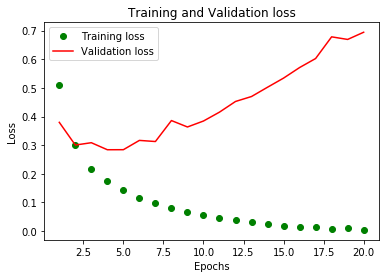

In [83]:
# training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_vlaues = history_dict['val_loss']

epochs = range(1, len(val_loss_vlaues) + 1)

plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_vlaues, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

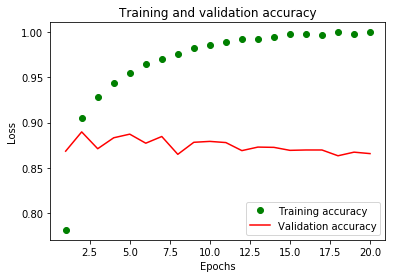

In [80]:
# training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'go', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

So, the training loss decreases and the training accuracy increases with every epoch. But the validation loss is lowest at the fourth epoch. The same for validation accuracy, i.e. it is highest at the fouth epoch.

The model is not performing well on unseen data. A classic case of overfitting.

## Retraining the Model

In [105]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [106]:
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [107]:
model.fit(X_train, y_train, epochs=4, batch_size=512)
res = model.evaluate(X_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 280us/step - loss: 0.4783 - acc: 0.8272
Epoch 2/4
25000/25000 [==============================] - 6s 229us/step - loss: 0.2786 - acc: 0.9075
Epoch 3/4
25000/25000 [==============================] - 6s 231us/step - loss: 0.2093 - acc: 0.9278
Epoch 4/4
25000/25000 [==============================] - 8s 300us/step


In [108]:
print(res)

[0.3049035261535645, 0.879]


We are getting about 88% accuracy with this approach. *Can we do any better?*

## Making Predictions

In [92]:
predictions = (model.predict(X_test))

In [93]:
print(predictions)

[[0.22218046]
 [0.99980015]
 [0.8726293 ]
 ...
 [0.15491095]
 [0.11633331]
 [0.5925775 ]]


## What can be done further?

* More/less number of nodes in the hidden layers (base results with 16).
* More/less number of hidden layers (base results with 2).
* Using some other loss function (hint: `mse`) (base results with `binary_crossentropy`).
* Using different activation function (hint: `tanh`) (base results with `relu`).